In [1]:
 #Install lazypredict using pip
 !pip install lazypredict



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#Importing required libraries

import lazypredict
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [3]:
df = pd.read_csv("applerevenue .csv")
df

,date,open,high,low,close,volume,profit or not
0,12-12-1980,0.10,0.10,0.10,0.10,469033600,0
1,15-12-1980,0.10,0.10,0.10,0.10,175884800,1
2,16-12-1980,0.09,0.09,0.09,0.09,105728000,1
3,17-12-1980,0.09,0.09,0.09,0.09,86441600,0
4,18-12-1980,0.09,0.09,0.09,0.09,73449600,0
...,...,...,...,...,...,...,...
10554,24-10-2022,147.19,150.23,146.00,149.45,75569074,0
10555,25-10-2022,150.09,152.49,149.36,152.34,73583421,0
10556,26-10-2022,150.96,151.99,148.04,149.35,87769611,1
10557,27-10-2022,148.07,149.05,144.13,144.80,108110875,1


In [4]:
# data types
df.dtypes

date              object
open             float64
high             float64
low              float64
close            float64
volume             int64
profit or not      int64
dtype: object

In [5]:
df.isnull().sum()

date             0
open             0
high             0
low              0
close            0
volume           0
profit or not    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [16]:
df.describe()

,open,high,low,close,volume,profit or not
count,10559.00,10559.00,10559.00,10559.00,10559.00,10559.00
mean,15.31,15.48,15.14,15.32,326327490.77,0.48
std,33.97,34.39,33.58,34.00,320115628.99,0.50
min,0.04,0.04,0.04,0.04,1001504.00,0.00
25%,0.24,0.24,0.23,0.24,121979200.00,0.00
50%,0.40,0.41,0.39,0.40,215978000.00,0.00
75%,13.65,13.78,13.50,13.65,407451800.00,1.00
max,181.88,182.19,178.38,181.26,2147483647.00,1.00


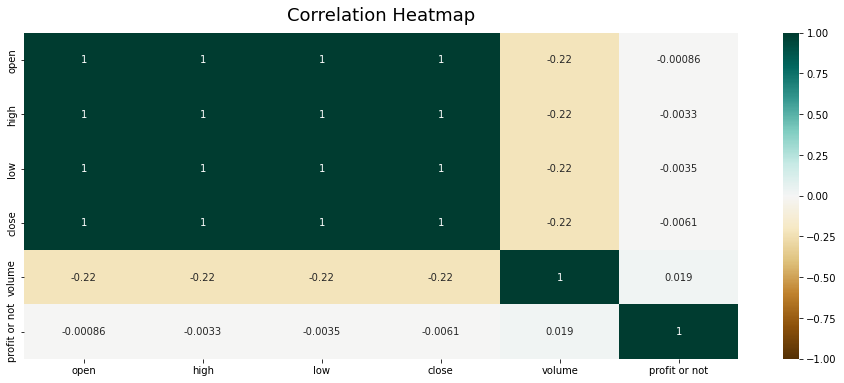

In [9]:
#Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [8]:
a=df.groupby(['date'])[['high']].sum().sort_values('high', ascending=False)
a

,high
date,
04-01-2022,182.19
03-01-2022,182.13
13-12-2021,181.38
28-12-2021,180.58
16-12-2021,180.39
...,...
12-07-1982,0.04
06-07-1982,0.04
07-07-1982,0.04


In [12]:
# Let's see a historical view of the opening price

fig = px.line(df, x='date', y="open")
fig.show()

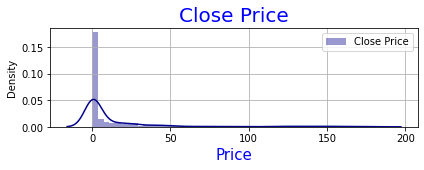

In [13]:
plt.subplot(2,1,2)
sns.distplot(df.close,color="darkblue",label="Close Price");
plt.title("Close Price",fontsize = 20,color='blue')
plt.xlabel('Price',fontsize = 15,color='blue')
plt.tight_layout()
plt.legend()
plt.grid()

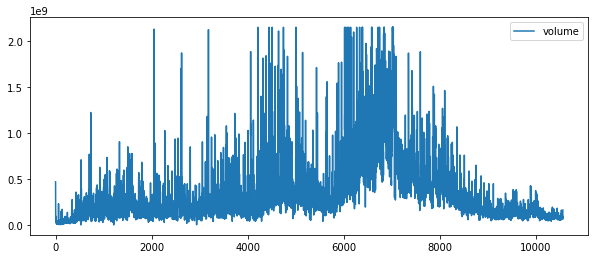

In [14]:
# Now let's plot the total volume of stock 
df['volume'].plot(legend=True,figsize=(10,4))
plt.show()

### Model 

In [17]:
# Creating our target variable
target = 'profit or not'
y = df[target]
X = df[['open','high','low','close']]
                     
# Splitting our data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
classifiers = LazyClassifier(ignore_warnings=True, custom_metric=None)
models,predictions = classifiers.fit(X_train, X_test, y_train, y_test)
print(models)


100%|██████████| 29/29 [00:40<00:00,  1.38s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.90               0.90     0.90      0.90   
RandomForestClassifier             0.87               0.86     0.86      0.87   
BaggingClassifier                  0.86               0.86     0.86      0.86   
KNeighborsClassifier               0.86               0.86     0.86      0.86   
DecisionTreeClassifier             0.85               0.85     0.85      0.85   
ExtraTreeClassifier                0.80               0.80     0.80      0.80   
NuSVC                              0.80               0.80     0.80      0.80   
LGBMClassifier                     0.73               0.73     0.73      0.73   
CalibratedClassifierCV             0.74               0.72     0.72      0.71   
QuadraticDiscriminantAnalysis      0.70               0.69     0.69      0.67   
LinearDiscriminantAnalysis  

# What a great library !

## Now I'll check to make sure that the library is working correctly


In [21]:
## KNeighborsClassifier will be used as a random choice
from sklearn import neighbors
from sklearn import metrics



In [20]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
pred = knn.fit(X_train, y_train).predict(X_test)

In [22]:
print("Accuracy of model is",metrics.accuracy_score(y_test, pred))

Accuracy of model is 0.8603219696969697
